In [1]:
!pip install category_encoders
!pip install lazypredict

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer, MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from lazypredict.Supervised import LazyClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# Load the dataset
url = 'Loan.csv'  # Replace with the actual URL or file path
data = pd.read_csv(url)
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.00,0.72,11,126928,0.20,0.23,419.81,0.18,0,49.00
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.08,0.94,3,43609,0.21,0.20,794.05,0.39,0,52.00
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.67,0.87,6,5205,0.22,0.21,666.41,0.46,0,52.00
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.00,0.90,5,99452,0.30,0.30,1047.51,0.31,0,54.00
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.33,0.94,5,227019,0.20,0.18,330.18,0.07,1,36.00


In [4]:
data.shape

(20000, 36)

In [5]:
data.describe() # Statistical Summary of Numerical Values

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,...,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,39.75,59161.47,571.61,17.52,24882.87,54.06,1.52,454.29,0.29,3.02,...,4891.72,0.80,5.00,72294.32,0.24,0.24,911.61,0.40,0.24,50.77
std,11.62,40350.85,51.00,11.32,13427.42,24.66,1.39,240.51,0.16,1.74,...,3296.77,0.12,2.24,117920.02,0.04,0.04,674.58,0.34,0.43,7.78
min,18.00,15000.00,343.00,0.00,3674.00,12.00,0.00,50.00,0.00,0.00,...,1250.00,0.26,0.00,1000.00,0.13,0.11,97.03,0.02,0.00,28.80
25%,32.00,31679.00,540.00,9.00,15575.00,36.00,0.00,286.00,0.16,2.00,...,2629.58,0.73,3.00,8734.75,0.21,0.21,493.76,0.18,0.00,46.00
50%,40.00,48566.00,578.00,17.00,21914.50,48.00,1.00,402.00,0.27,3.00,...,4034.75,0.82,5.00,32855.50,0.24,0.24,728.51,0.30,0.00,52.00
75%,48.00,74391.00,609.00,25.00,30835.00,72.00,2.00,564.00,0.39,4.00,...,6163.00,0.89,6.00,88825.50,0.26,0.27,1112.77,0.51,0.00,56.00
max,80.00,485341.00,712.00,61.00,184732.00,120.00,5.00,2919.00,0.92,13.00,...,25000.00,1.00,16.00,2603208.00,0.41,0.45,10892.63,4.65,1.00,84.00


In [6]:
#Remove Application date, TotalDebtToIncomeRatio from the data
data = data.drop(['ApplicationDate', 'TotalDebtToIncomeRatio'], axis=1)

In [7]:
data.isna().sum() #Checking for Null Values

Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

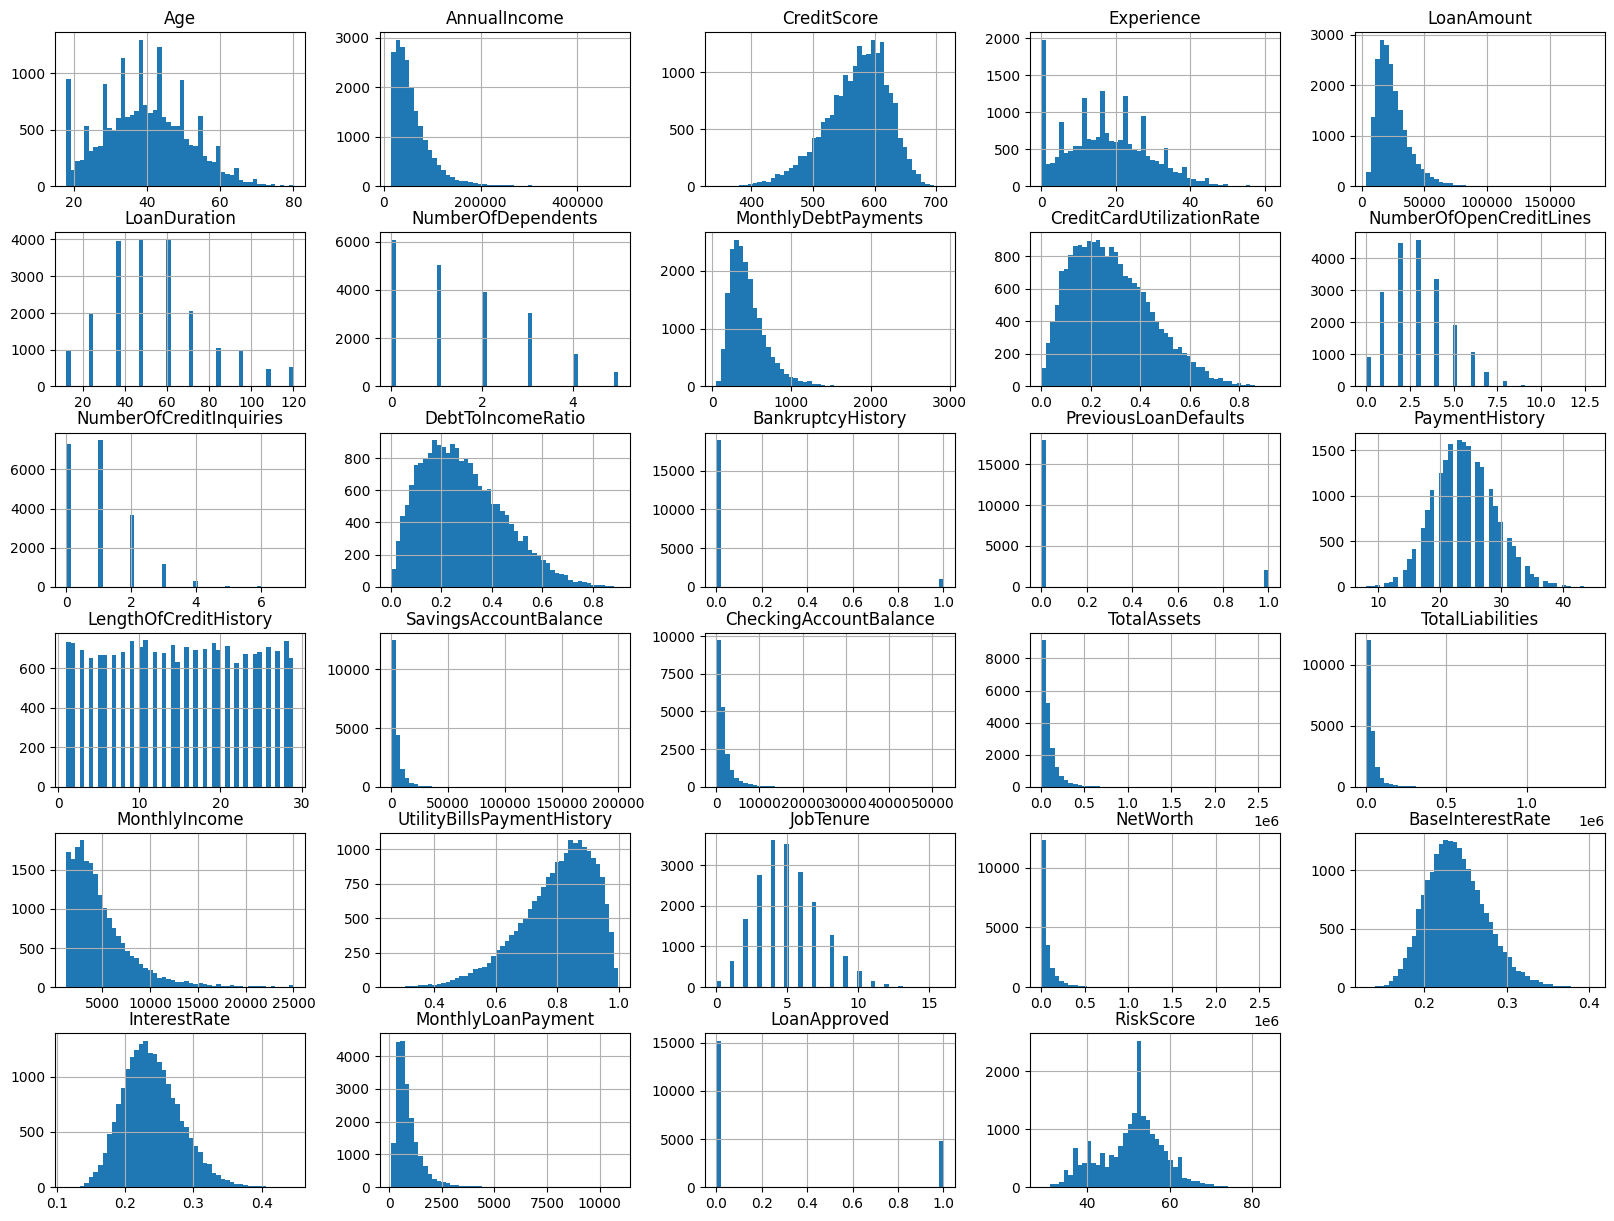

In [8]:
# Plots to show distribution of numerical values
data.hist(bins=50, figsize=(20,15))
plt.show()

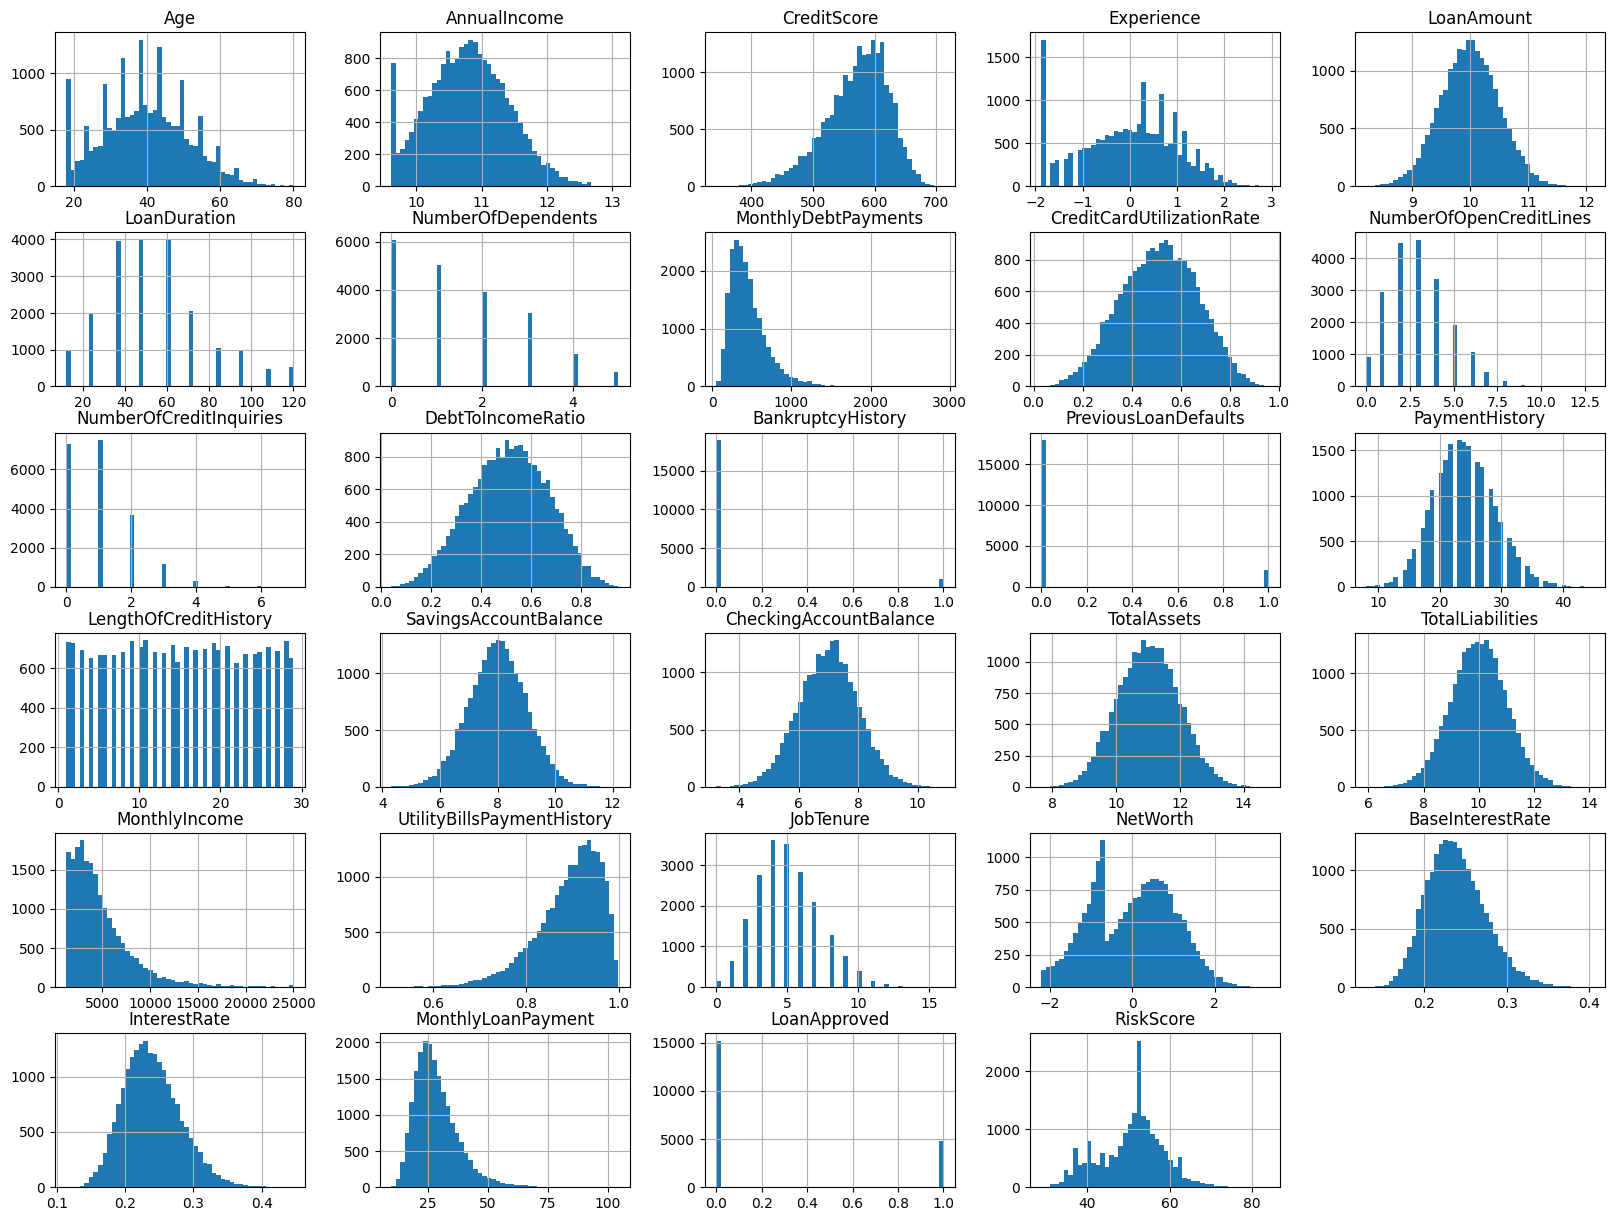

In [9]:
# Applying Various Transformations to remove skewness in data

#Log Transformation
log_columns = ['AnnualIncome', 'LoanAmount', 'TotalAssets', 'TotalLiabilities', 'CheckingAccountBalance', 'SavingsAccountBalance']
data[log_columns] = data[log_columns].apply(np.log1p)

#Sqrt Transformation
sqrt_columns = ['DebtToIncomeRatio', 'CreditCardUtilizationRate', 'MonthlyLoanPayment','UtilityBillsPaymentHistory']
data[sqrt_columns] = data[sqrt_columns].apply(np.sqrt)

#Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
data[['NetWorth']] = pt.fit_transform(data[['NetWorth']])
data[['Experience']] = pt.fit_transform(data[['Experience']])

data.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [11]:
# Display unique classes for each categorical column
for col in categorical_cols:
    unique_classes = data[col].unique()
    print(f"Column '{col}' has the following classes: {unique_classes}")

Column 'EmploymentStatus' has the following classes: ['Employed' 'Self-Employed' 'Unemployed']
Column 'EducationLevel' has the following classes: ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
Column 'MaritalStatus' has the following classes: ['Married' 'Single' 'Divorced' 'Widowed']
Column 'HomeOwnershipStatus' has the following classes: ['Own' 'Mortgage' 'Rent' 'Other']
Column 'LoanPurpose' has the following classes: ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [12]:
# Encoding the categorical columns
categorical_columns = ['EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']

# Initialize BinaryEncoder
binary_encoder = BinaryEncoder(cols=categorical_columns)

# Apply Binary Encoding
data_encoded = binary_encoder.fit_transform(data)

# Manual Mapping for EducationLevel Column to maintain the ordinal relationship
education_mapping = {
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}
data_encoded['EducationLevel'] = data_encoded['EducationLevel'].map(education_mapping)

In [13]:
data_encoded

,Age,AnnualIncome,CreditScore,EmploymentStatus_0,EmploymentStatus_1,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus_0,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,LoanApproved,RiskScore
0,45,10.60,617,0,1,4,0.48,9.48,48,0,...,9.86,3329.00,0.85,11,1.02,0.20,0.23,20.49,0,49.00
1,38,10.59,628,0,1,2,-0.09,10.17,48,0,...,9.17,3309.08,0.97,3,0.27,0.21,0.20,28.18,0,52.00
2,47,10.61,570,0,1,3,0.78,9.78,36,0,...,11.77,3393.67,0.93,6,-1.17,0.22,0.21,25.81,0,52.00
3,58,11.14,545,0,1,1,1.33,10.54,96,0,...,8.59,5757.00,0.95,5,0.85,0.30,0.30,32.37,0,54.00
4,37,11.55,594,0,1,2,0.08,9.13,36,0,...,9.76,8605.33,0.97,5,1.45,0.20,0.18,18.17,1,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,10.31,587,0,1,1,0.25,10.11,36,0,...,10.15,2515.00,0.91,1,0.43,0.22,0.20,30.10,0,55.00
19996,56,10.80,567,0,1,2,1.26,10.16,36,0,...,8.63,4103.83,0.90,3,0.54,0.23,0.20,30.96,0,54.00
19997,44,10.80,645,0,1,3,0.33,10.52,72,0,...,8.45,4079.83,0.94,3,0.88,0.23,0.23,30.75,0,45.00
19998,60,10.62,560,0,1,1,1.46,9.60,72,0,...,9.35,3418.75,0.92,5,-0.70,0.25,0.26,20.28,0,59.00


In [14]:
data_encoded.to_csv('encoded_data.csv', index=False)

In [15]:
#Dividing into X and Y
X = data_encoded.drop(['LoanApproved', 'RiskScore'], axis=1)
y = data_encoded['LoanApproved']

In [16]:
# Use Column Transformer to apply min max scaler on numnerical columns of X
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
Scaler  = MinMaxScaler()
for col in numerical_cols:
  X[col] = Scaler.fit_transform(X[[col]])


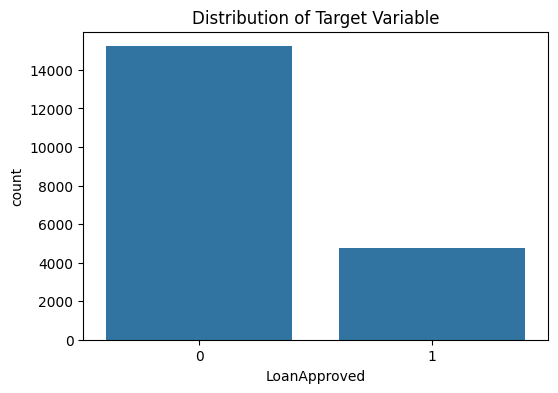

In [17]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.show()

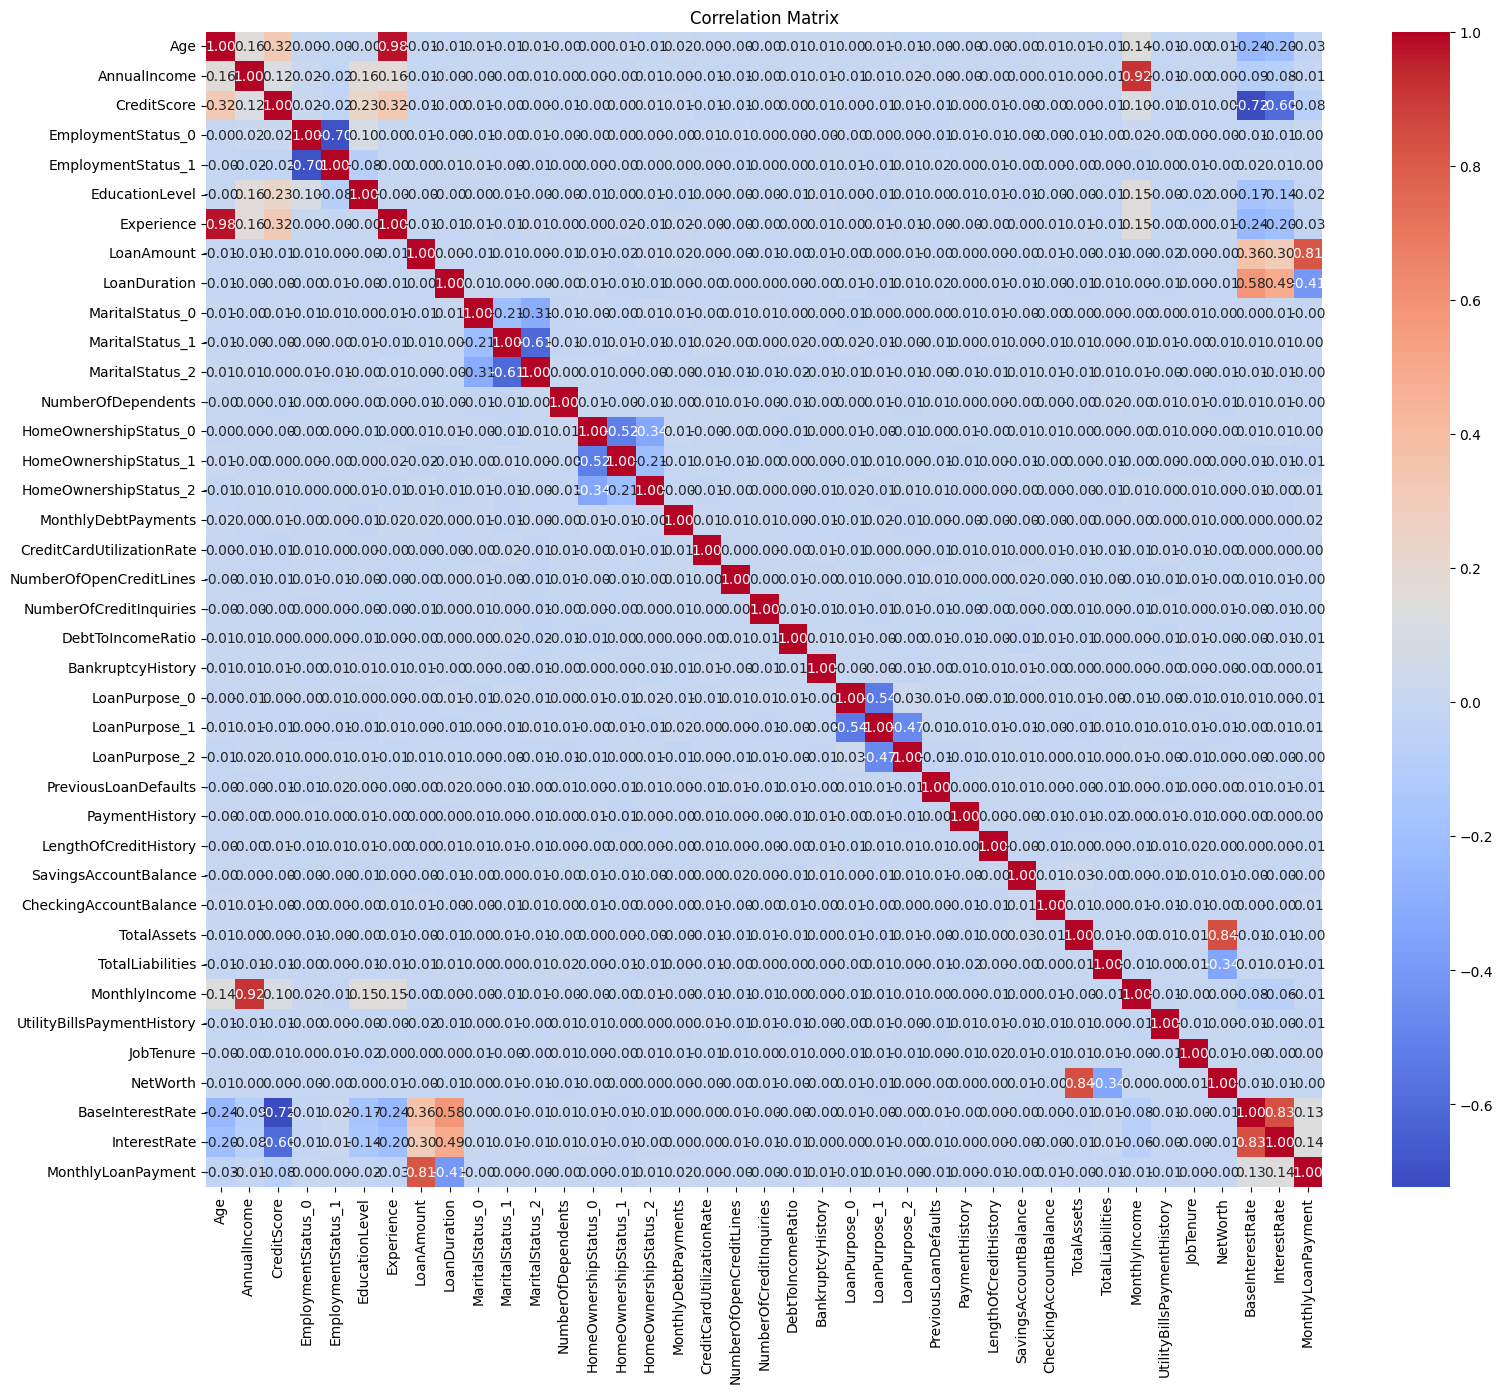

In [18]:
corr_matrix = X.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
## Removing Columns with High Correlation
# Find pairs of features with correlation > 0.8 (or < -0.8)
threshold = 0.8
high_corr_pairs = []

# Iterate through the correlation matrix and find highly correlated pairs
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j]))

# Display highly correlated pairs
print("Highly Correlated Feature Pairs (|correlation| > 0.8):")
print(high_corr_pairs)

# Drop one feature from each highly correlated pair
features_to_drop = set(pair[1] for pair in high_corr_pairs) 
X_reduced = X.drop(columns=features_to_drop)

# Display the remaining features
print("\nRemaining Features After Dropping Highly Correlated Ones:")
print(X_reduced.columns)
X_reduced.shape

Highly Correlated Feature Pairs (|correlation| > 0.8):
[('Age', 'Experience'), ('AnnualIncome', 'MonthlyIncome'), ('LoanAmount', 'MonthlyLoanPayment'), ('TotalAssets', 'NetWorth'), ('BaseInterestRate', 'InterestRate')]

Remaining Features After Dropping Highly Correlated Ones:
Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus_0',
       'EmploymentStatus_1', 'EducationLevel', 'LoanAmount', 'LoanDuration',
       'MaritalStatus_0', 'MaritalStatus_1', 'MaritalStatus_2',
       'NumberOfDependents', 'HomeOwnershipStatus_0', 'HomeOwnershipStatus_1',
       'HomeOwnershipStatus_2', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose_0', 'LoanPurpose_1', 'LoanPurpose_2',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'UtilityB

(20000, 34)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
y_train.value_counts()

LoanApproved
0    12176
1     3824
Name: count, dtype: int64

In [22]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
y_train_resampled.value_counts()

LoanApproved
0    12176
1    12176
Name: count, dtype: int64

In [24]:
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)

  0%|          | 0/31 [00:00<?, ?it/s]

  3%|▎         | 1/31 [00:03<01:46,  3.54s/it]


KeyboardInterrupt: 

Model Performance:
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifier                    0.88               0.90     0.90      0.88   
RidgeClassifierCV                  0.88               0.90     0.90      0.88   
LinearDiscriminantAnalysis         0.88               0.90     0.90      0.88   
LogisticRegression                 0.90               0.90     0.90      0.91   
LinearSVC                          0.90               0.90     0.90      0.90   
CalibratedClassifierCV             0.90               0.90     0.90      0.91   
SVC                                0.91               0.89     0.89      0.91   
LGBMClassifier                     0.92               0.89     0.89      0.92   
AdaBoostClassifier                 0.91               0.89     0.89      0.91   
SGDClassifier                      0.90               0.89     0.89      0.90   
XGBClassi

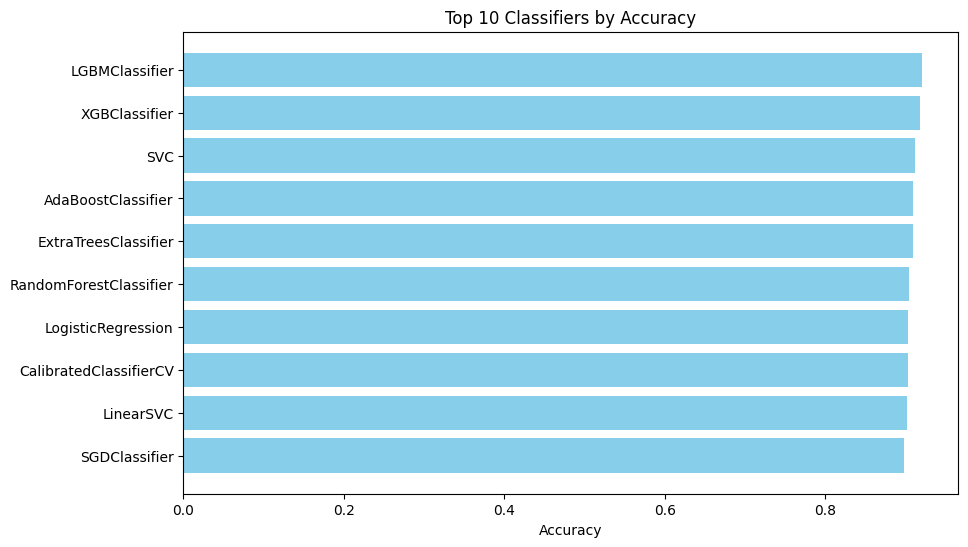

In [ ]:
# Display the results
print("Model Performance:")
print(models)

# Save the results to a CSV file for further analysis
models.to_csv('model_comparison_results.csv')

# Visualize the top-performing models
top_models = models.sort_values(by='Accuracy', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_models.index, top_models['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Top 10 Classifiers by Accuracy')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for stochastic search
param_dist = {
    'num_leaves': np.arange(20, 150, 10),
    'max_depth': [None] + list(range(3, 15, 2)),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': [50, 100, 200, 500, 1000],
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'min_child_samples': [10, 20, 30, 50],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=100,  # Number of random parameter combinations to try
    scoring='roc_auc',  # Optimize for AUC-ROC
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = random_search.best_estimator_
print("Best Parameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 12176, number of negative: 12176
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5654
[LightGBM] [Info] Number of data points in the train set: 24352, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters:
{'subsample': np.float64(1.0), 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'num_leaves': np.int64(80), 'n_estimators': 500, 'min_child_samples': 20, 'max_depth': 13, 'learning_rate': np.float64(0.042222222222222223), 'colsample_bytree': np.float64(0.625)}



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3044
           1       0.85      0.82      0.84       956

    accuracy                           0.92      4000
   macro avg       0.90      0.89      0.89      4000
weighted avg       0.92      0.92      0.92      4000

AUC-ROC: 0.97


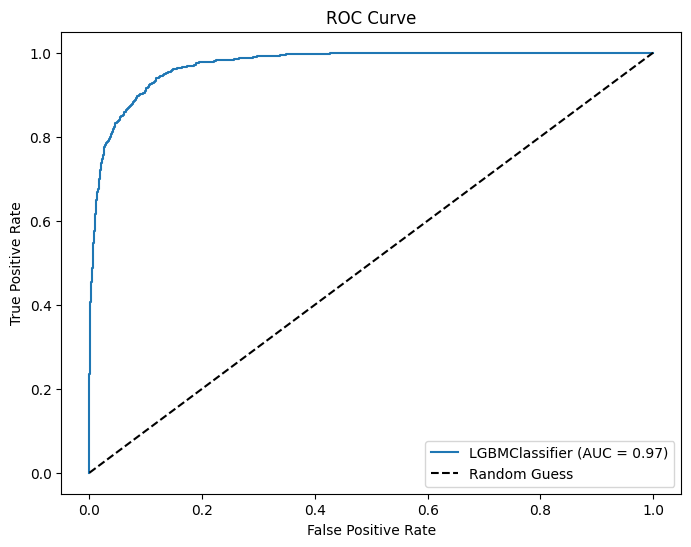

In [ ]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc:.2f}")

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LGBMClassifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

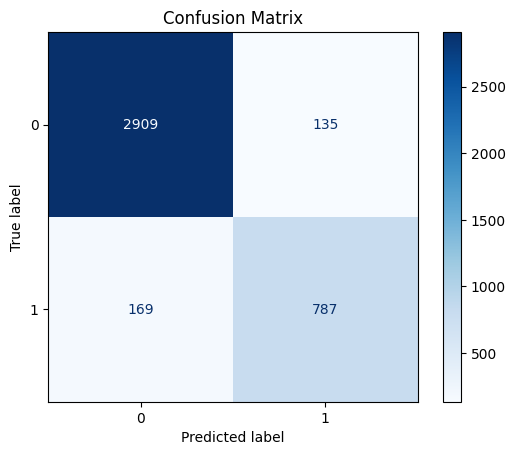

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()


In [29]:
# Function to create a Keras model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                    activation=hp.Choice('activation_input', ['relu', 'tanh']),
                    input_dim=X_train.shape[1]))
    for i in range(hp.Int('num_layers', 1, 3)): 
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation=hp.Choice('activation_hidden', ['relu', 'tanh'])))
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))  # Dropout for regularization
    model.add(Dense(units=1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of model evaluations per trial
    directory='hyperparameter_tuning',
    project_name='loan_approval_nn'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Units (Input Layer): {best_hps.get('units_input')}")
print(f"Activation (Input Layer): {best_hps.get('activation_input')}")
print(f"Number of Hidden Layers: {best_hps.get('num_layers')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Trial 10 Complete [00h 00m 20s]
val_accuracy: 0.9209374785423279

Best val_accuracy So Far: 0.9259374737739563
Total elapsed time: 00h 04m 15s
Best Hyperparameters:
Units (Input Layer): 448
Activation (Input Layer): relu
Number of Hidden Layers: 1
Learning Rate: 0.004998741129453313
Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7995 - loss: 0.4382 - val_accuracy: 0.9112 - val_loss: 0.2044
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8962 - loss: 0.2324 - val_accuracy: 0.8662 - val_loss: 0.2904
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9040 - loss: 0.2190 - val_accuracy: 0.9178 - val_loss: 0.1925
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9044 - loss: 0.2164 - val_accuracy: 0.9128 - val_loss: 0.1977
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9034 - loss: 0.2196 - val_accuracy: 0.9153 - val_loss: 0.1979
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9168 - los

In [38]:
# Evaluate the model on the test set
y_pred_nn = (best_model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print AUC-ROC
y_prob_nn = best_model.predict(X_test).ravel()
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc:.2f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3044
           1       0.84      0.81      0.82       956

    accuracy                           0.92      4000
   macro avg       0.89      0.88      0.89      4000
weighted avg       0.92      0.92      0.92      4000

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
AUC-ROC: 0.97


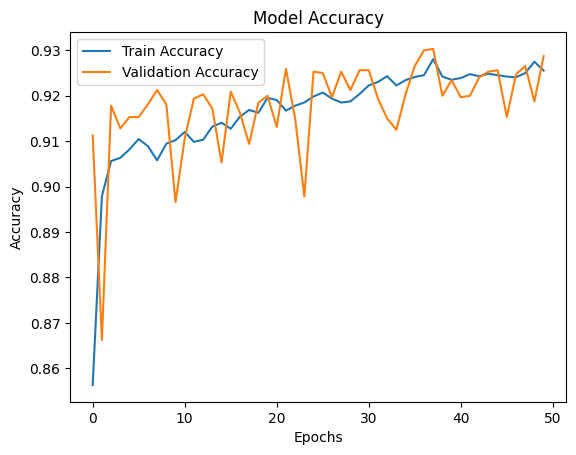

In [39]:
# Plot the learning curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

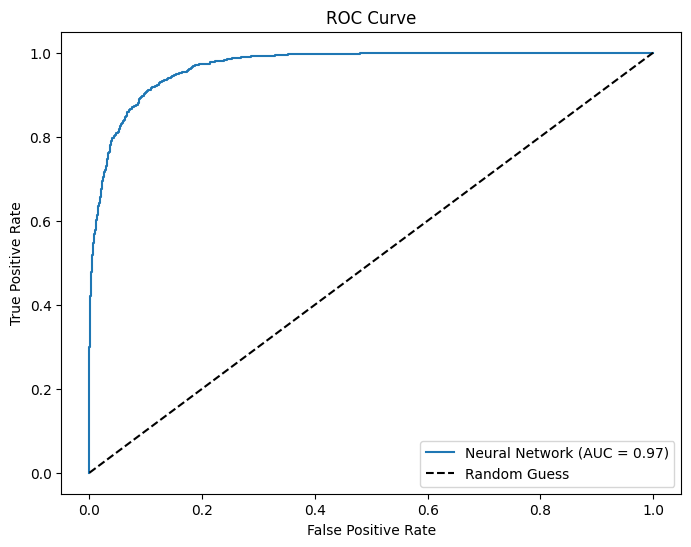

In [40]:
# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_nn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

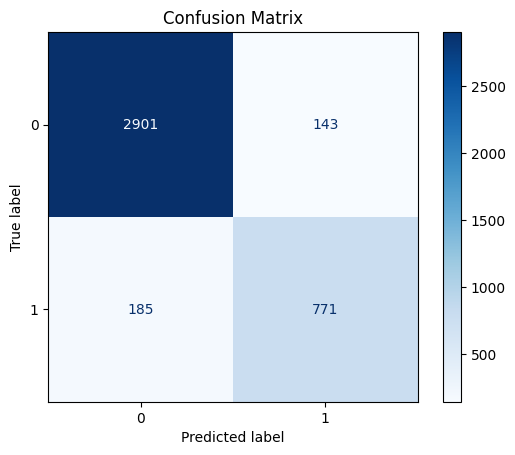

In [44]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()